<a href="https://www.kaggle.com/code/kappa1312/steel-industry-energy-consumption?scriptVersionId=99450501" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Steel Industry Energy Consumption
The data is collected from a smart small-scale steel industry in South Korea, our main task is to classify the load type on the industry.

In [1]:
#importing the basic important libraries for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading the data set
df = pd.read_csv('../input/teel-industry-data/Steel_industry_datasets.csv')
df.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [3]:
#Renaming the column because it will result in errors in further codes
df = df.rename(columns = {'Lagging_Current_Reactive.Power_kVarh' : 'Lagging_Current_Reactive_Power_kVarh', 
                          'CO2(tCO2)' : 'CO2'})

In [4]:
#checking for null values in the df
df.isnull().sum()

date                                    0
Usage_kWh                               0
Lagging_Current_Reactive_Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2                                     0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
WeekStatus                              0
Day_of_week                             0
Load_Type                               0
dtype: int64

In [5]:
#getting an overall look over the df and basic idea for some outliers
df.describe()

,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,27.386892,13.035384,3.870949,0.011524,80.578056,84.367870,42750.000000
std,33.444380,16.306000,7.424463,0.016151,18.921322,30.456535,24940.534317
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000,2.300000,0.000000,0.000000,63.320000,99.700000,21375.000000
50%,4.570000,5.000000,0.000000,0.000000,87.960000,100.000000,42750.000000
75%,51.237500,22.640000,2.090000,0.020000,99.022500,100.000000,64125.000000
max,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000


In [6]:
#checking the data-types and another way to check for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive_Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2                                   35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  object 
dtypes: float64(6), 

In [7]:
#Correlation matrix
df.corr()

,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
Usage_kWh,1.000000,0.896150,-0.324922,0.988180,0.385960,0.353566,0.234610
Lagging_Current_Reactive_Power_kVarh,0.896150,1.000000,-0.405142,0.886948,0.144534,0.407716,0.082662
Leading_Current_Reactive_Power_kVarh,-0.324922,-0.405142,1.000000,-0.332777,0.526770,-0.944039,0.371605
CO2,0.988180,0.886948,-0.332777,1.000000,0.379605,0.360019,0.231726
Lagging_Current_Power_Factor,0.385960,0.144534,0.526770,0.379605,1.000000,-0.519967,0.565270
Leading_Current_Power_Factor,0.353566,0.407716,-0.944039,0.360019,-0.519967,1.000000,-0.360563
NSM,0.234610,0.082662,0.371605,0.231726,0.565270,-0.360563,1.000000


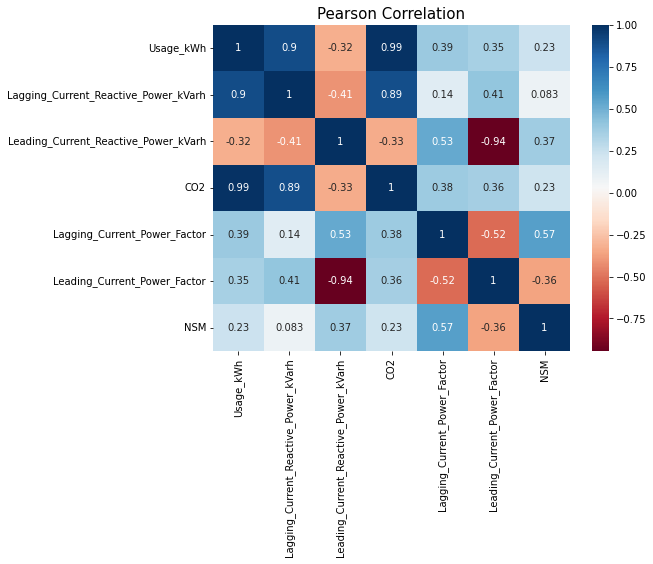

In [8]:
#Plotting the correlation matrix
plt.figure(figsize = (8,6))
sns.heatmap(df.corr(), annot = True, cmap = 'RdBu')
plt.title("Pearson Correlation", fontsize = 15, loc = 'center')
plt.show()

# Exploratory Data Analysis (EDA)

In [9]:
#Most energy consumption based on time
most_energy_consumption = pd.pivot_table(df, index = 'date', values = 'Usage_kWh', aggfunc = {'Usage_kWh' : np.max})
most_energy_consumption.head(10)

,Usage_kWh
date,
01/01/2018 00:00,3.42
01/01/2018 00:15,3.17
01/01/2018 00:30,4.00
01/01/2018 00:45,3.24
01/01/2018 01:00,3.31
01/01/2018 01:15,3.82
01/01/2018 01:30,3.28
01/01/2018 01:45,3.60
01/01/2018 02:00,3.60


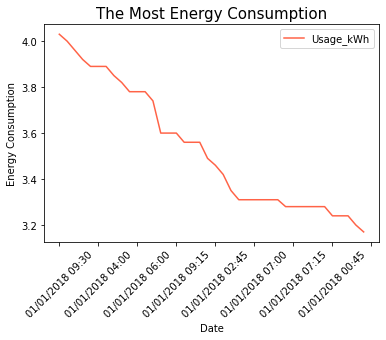

In [10]:
#Most energy consumption on time
chart = most_energy_consumption[:40].sort_values(by = 'Usage_kWh', ascending = False).plot(kind = 'line', color = 'tomato')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45)
plt.title('The Most Energy Consumption', fontsize = 15, loc = 'center')
plt.xlabel('Date')
plt.ylabel('Energy Consumption')
plt.show()

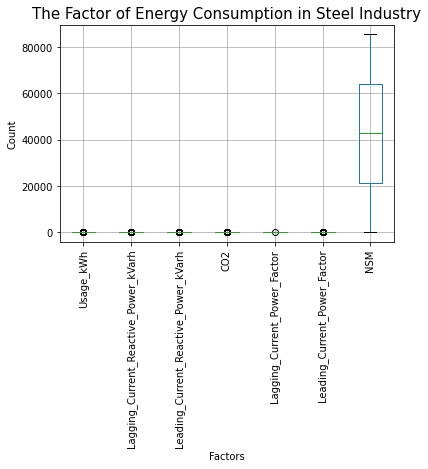

In [11]:
#Factor of energy consumption
chart = df.boxplot(column = ['Usage_kWh', 'Lagging_Current_Reactive_Power_kVarh', 'Leading_Current_Reactive_Power_kVarh',
                    'CO2', 'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM'])
chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
plt.title('The Factor of Energy Consumption in Steel Industry', fontsize = 15)
plt.xlabel('Factors')
plt.ylabel('Count')
plt.show()

In [12]:
#Average energy consumption and NSM based on load type, day of week and week status
pd.pivot_table(df, index = ['Load_Type', 'Day_of_week', 'WeekStatus'], values = ['NSM', 'Usage_kWh'], 
               aggfunc = {'NSM' : np.mean, 'Usage_kWh' : np.mean})

NSM  Usage_kWh
Load_Type    Day_of_week WeekStatus                         
Light_Load   Friday      Weekday     23206.204380  11.361442
             Monday      Weekday     24026.223776   8.805459
             Saturday    Weekend     31381.843575   7.072210
             Sunday      Weekend     39144.653465   4.171106
             Thursday    Weekday     23206.204380  11.803964
             Tuesday     Weekday     24074.199288  10.510040
             Wednesday   Weekday     24074.199288  10.780560
Maximum_Load Friday      Weekday     53106.000000  61.043700
             Monday      Weekday     53106.000000  66.278233
             Saturday    Weekend     52492.105263  41.529605
             Sunday      Weekend     52826.470588  29.195662
             Thursday    Weekday     53106.000000  64.522758
             Tuesday     Weekday     53176.530612  66.023359
             Wednesday   Weekday     53176.530612  62.358359
Medium_Load  Friday      Weekday     61758.000000  42.220494
             Monday      Weekday     61758.000000  43.097231
             Saturday    Weekend     62218.421053  17.547648
             Sunday      Weekend     61967.647059  16.368934
             Thursday    Weekday     61758.000000  44.986200
             Tuesday     Weekday     61705.102041  45.020797
             Wednesday   Weekday     61705.102041  40.462379

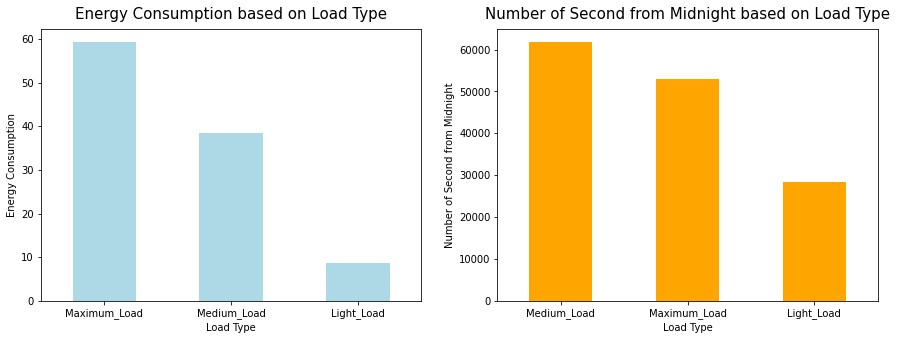

In [13]:
#Energy consumption based on load type
plt.rcParams['figure.figsize'] = (15,5)
plt.subplot(1, 2, 1)
chart = df.groupby('Load_Type')['Usage_kWh'].mean().sort_values(ascending = False).plot(kind = 'bar', color = 'lightblue')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 0)
plt.title('Energy Consumption based on Load Type', fontsize = 15, pad = 10)
plt.xlabel('Load Type')
plt.ylabel('Energy Consumption')

#Number of second from midnight based on load type
plt.subplot(1, 2, 2)
chart = df.groupby('Load_Type')['NSM'].mean().sort_values(ascending = False).plot(kind = 'bar', color = 'orange')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 0)
plt.title('Number of Second from Midnight based on Load Type', fontsize = 15, pad = 10)
plt.xlabel('Load Type')
plt.ylabel('Number of Second from Midnight')
plt.show()

<Figure size 504x360 with 0 Axes>

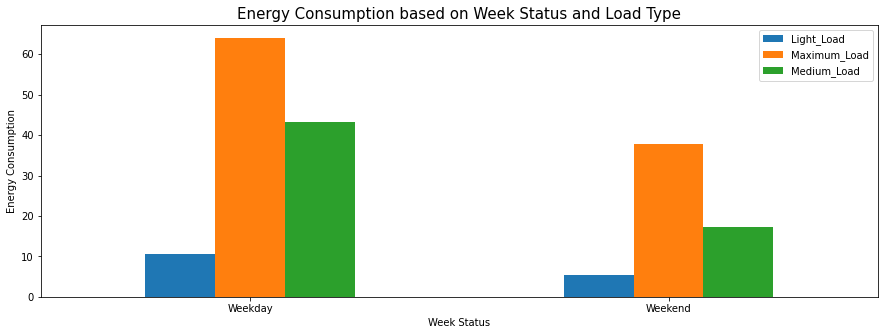

In [14]:
#Energy consumption based on week status and load type
plt.figure(figsize = (7, 5))
chart = df.groupby(['WeekStatus','Load_Type'])['Usage_kWh'].mean().unstack().plot(kind = 'bar')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 0)
plt.title('Energy Consumption based on Week Status and Load Type', fontsize = 15)
plt.xlabel('Week Status')
plt.ylabel('Energy Consumption')
plt.legend()
plt.show()

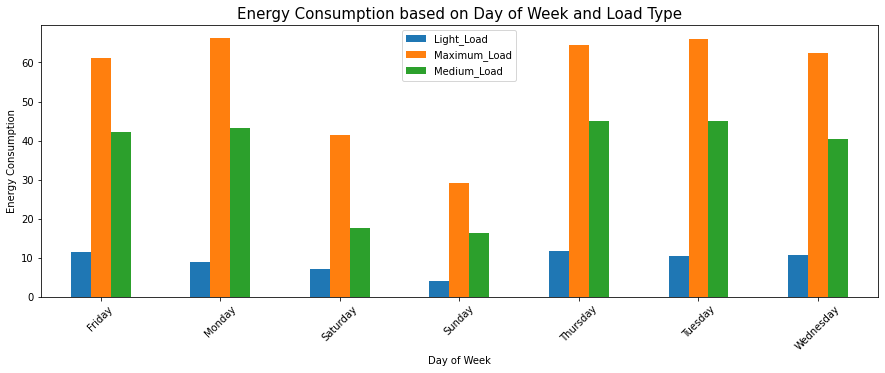

In [15]:
#Energy consumption based on day of week and load type
chart = df.groupby(['Day_of_week','Load_Type'])['Usage_kWh'].mean().unstack().plot(kind = 'bar')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45)
plt.title('Energy Consumption based on Day of Week and Load Type', fontsize = 15)
plt.xlabel('Day of Week')
plt.ylabel('Energy Consumption')
plt.legend()
plt.show()

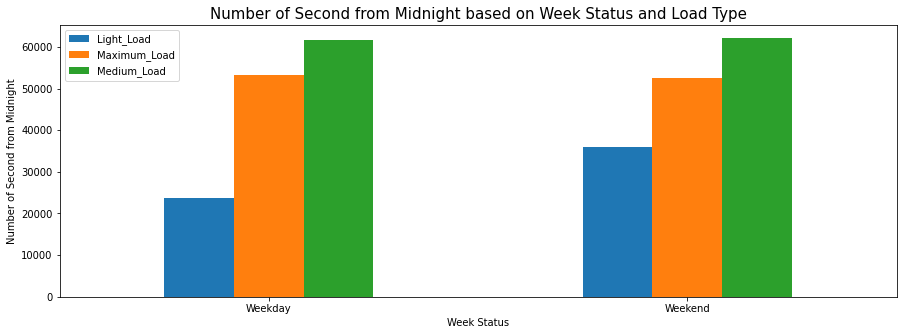

In [16]:
#Number of second from midnight based on week status and load type
chart = df.groupby(['WeekStatus','Load_Type'])['NSM'].mean().unstack().plot(kind = 'bar')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 0)
plt.title('Number of Second from Midnight based on Week Status and Load Type', fontsize = 15)
plt.xlabel('Week Status')
plt.ylabel('Number of Second from Midnight')
plt.legend()
plt.show()

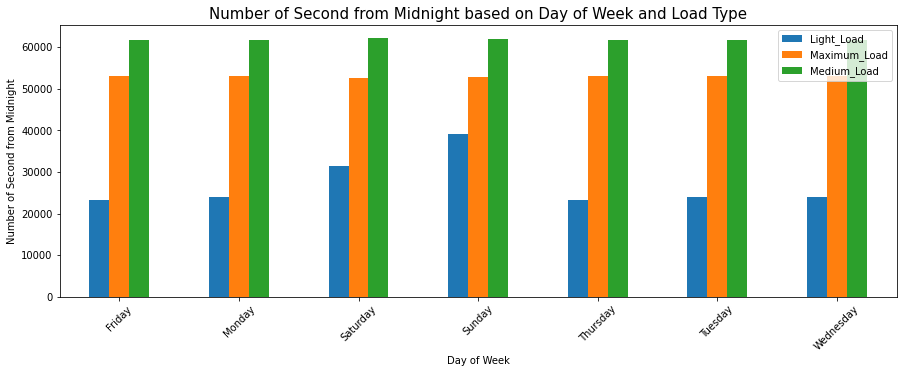

In [17]:
#Number of second from midnight based on day of week and load type
chart = df.groupby(['Day_of_week','Load_Type'])['NSM'].mean().unstack().plot(kind = 'bar')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45)
plt.title('Number of Second from Midnight based on Day of Week and Load Type', fontsize = 15)
plt.xlabel('Day of Week')
plt.ylabel('Number of Second from Midnight')
plt.legend()
plt.show()

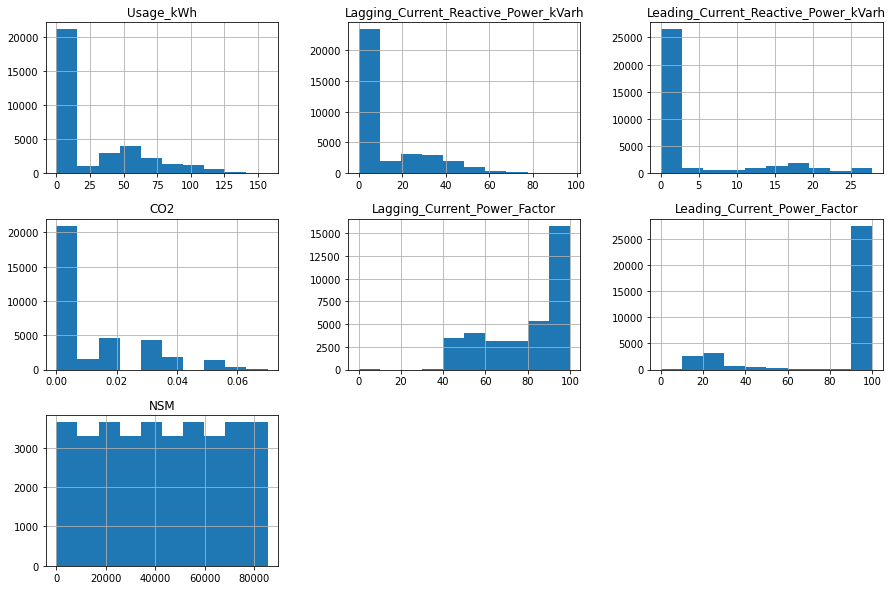

In [18]:
#Distribution of each variable
df.hist(figsize = (15,10))
plt.show()

# Regression Model

In [19]:
#Indexing date
df = df.set_index('date')

#Handling categorical data
df = pd.get_dummies(df, drop_first = True)
df.head()

,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus_Weekend,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday,Load_Type_Maximum_Load,Load_Type_Medium_Load
date,,,,,,,,,,,,,,,,
01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,0,1,0,0,0,0,0,0,0
01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,0,1,0,0,0,0,0,0,0
01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,0,1,0,0,0,0,0,0,0
01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,0,1,0,0,0,0,0,0,0
01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,0,1,0,0,0,0,0,0,0


In [20]:
#Splitting data set
from sklearn.model_selection import train_test_split
X = df.drop('Usage_kWh', axis = 1)
y = df['Usage_kWh']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [21]:
#Linear Regression Model
from sklearn.linear_model import LinearRegression, Ridge, Lasso
lr = LinearRegression()
%time lr.fit(X_train, y_train)
lr.score(X_test, y_test)

CPU times: user 19.1 ms, sys: 21.1 ms, total: 40.2 ms
Wall time: 29.2 ms


0.9832861621098329

In [22]:
#Ridge Regression Model
ridge = Ridge(alpha = 0.5)
%time ridge.fit(X_train, y_train)
ridge.score(X_test, y_test)

CPU times: user 8.99 ms, sys: 7.27 ms, total: 16.3 ms
Wall time: 11.2 ms


0.968424696651737

In [23]:
#Lasso Regression Model
lasso = Lasso(alpha = 0.5)
%time lasso.fit(X_train, y_train)
lasso.score(X_test, y_test)

CPU times: user 114 ms, sys: 88.7 ms, total: 203 ms
Wall time: 52.5 ms


0.911224635232591

In [24]:
#importing libraries for some other models
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, classification_report, r2_score

> Decision Tree Regressor

In [25]:
dtr = DecisionTreeRegressor()
%time dtr.fit(X_train, y_train)
dtr.score(X_test, y_test)

CPU times: user 142 ms, sys: 994 µs, total: 143 ms
Wall time: 145 ms


0.9980790958912598

> Random Forest Regressor

In [26]:
rf = RandomForestRegressor()
%time rf.fit(X_train, y_train)
rf.score(X_test, y_test)

CPU times: user 9.04 s, sys: 95.2 ms, total: 9.13 s
Wall time: 9.13 s


0.9991555957743917

> K Neighbors Regressor

In [27]:
knr = KNeighborsRegressor()
%time knr.fit(X_train, y_train)
knr.score(X_test, y_test)

CPU times: user 54.4 ms, sys: 1.9 ms, total: 56.3 ms
Wall time: 55.7 ms


0.9817825843920276

> SVR

In [28]:
svr = SVR()
%time svr.fit(X_train, y_train)
svr.score(X_test, y_test)

CPU times: user 54.1 s, sys: 167 ms, total: 54.2 s
Wall time: 54.2 s


0.2726867499413318

In [29]:
df.head()

,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus_Weekend,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday,Load_Type_Maximum_Load,Load_Type_Medium_Load
date,,,,,,,,,,,,,,,,
01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,0,1,0,0,0,0,0,0,0
01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,0,1,0,0,0,0,0,0,0
01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,0,1,0,0,0,0,0,0,0
01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,0,1,0,0,0,0,0,0,0
01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,0,1,0,0,0,0,0,0,0


Now we will compare the Mean absolute error and Mean squared error for the regressions with highest accuracy (Linear Regression, Decision Tree, Random Forest and K Neighbors)

In [30]:
def check(model, name='Default'):
    y_pred = model.predict(X_test)
    print(name, ":")
    print('Mean Absolute Error : ', metrics.mean_absolute_error(y_test, y_pred))
    print('Mean Squared Error : ', metrics.mean_squared_error(y_test, y_pred))
    print('R2 Sore : ', metrics.r2_score(y_test, y_pred), end='\n\n')

In [31]:
#check MAE, MSE
check(lr, "Linear Regression")
check(dtr, "Decision Tree Regressor")
check(rf, "Random Forest Regressor")
check(knr, "K Neighbors Regressor")

Linear Regression :
Mean Absolute Error :  2.574117185045871
Mean Squared Error :  18.65915768610027
R2 Sore :  0.9832861621098329

Decision Tree Regressor :
Mean Absolute Error :  0.537349695585997
Mean Squared Error :  2.1444777016742766
R2 Sore :  0.9980790958912598

Random Forest Regressor :
Mean Absolute Error :  0.3354042522831051
Mean Squared Error :  0.9426842416428832
R2 Sore :  0.9991555957743917

K Neighbors Regressor :
Mean Absolute Error :  1.860552701674277
Mean Squared Error :  20.337736472983256
R2 Sore :  0.9817825843920276



**Conclusion**

We can conclude from the accuracy, wall time and errors taht **Random Forest Regressor** is the best model for the dataset giving the best **R-Square of 0.9991** and lowest **Mean absolute error of 0.337** and **Mean squared error of 0.948**